In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
from matplotlib import rc
df = pd.read_csv('data/opportunities.csv',low_memory=False)
#df.info()

In [2]:
#Convierto columna Last_Modified_Date a date
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')

In [3]:
#Convierto columna Opportunity_Created_Date a date
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')

In [4]:
#Agrego columna Diferencia en dias entre la fecha de creacion de la oportunidad y la ultima modificacion de la oportunidad
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days

In [5]:
#Agrupo por oportunidad
df_agrupado_x_oportunidad = df.groupby(["Opportunity_ID"]).agg({"Stage":'first', "diferencia_en_dias":"first", "ID":"first"}).reset_index()
#df_agrupado_x_oportunidad[df_agrupado_x_oportunidad["Opportunity_ID"] == 2008]

In [6]:
#Cantidad de oportunidades segun la cantidad de dias que se tomo en llegar a Closed Won/Lost
df_cant_oportunidades_por_cant_dias = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
#df_cant_oportunidades_por_cant_dias

### Cantidad de oportunidades por duracion de la oportunidad

In [7]:
#Separo DF en 2 segun Stage (Close Lost y Closed Won)
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
#df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias_Won[df_cant_oportunidades_por_cant_dias_Won["duracion_oportunidad_en_dias"] > 1]
#df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias_Lost[df_cant_oportunidades_por_cant_dias_Lost["duracion_oportunidad_en_dias"] > 1]
df_cant_oportunidades_por_cant_dias_Won.head(5)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,359
611,Closed Won,1,238
612,Closed Won,2,82
613,Closed Won,3,73
614,Closed Won,4,43


Text(0, 0.5, 'Cantidad de oportunidades por duracion de la oportunidad')

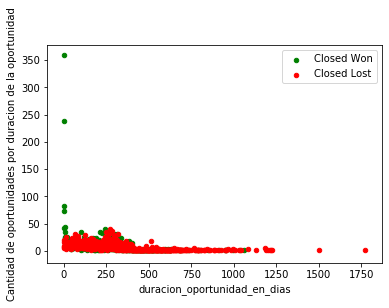

In [8]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

### Porcentaje de oportunidades Lost/Won por duracion de la oportunidad

In [9]:
df_cant_oportunidades_lost_vs_won = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["diferencia_en_dias", "Stage"]).agg({'ID':'count'}).unstack()#.reset_index()
df_cant_oportunidades_lost_vs_won.columns = ["cantidad_oportunidades_Lost", "cantidad_oportunidades_Won"]
#df_cant_oportunidades_lost_vs_won

In [10]:
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won.divide(df_cant_oportunidades_lost_vs_won.sum(axis=1), axis=0)
#df_cant_oportunidades_lost_vs_won_perc

In [11]:
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 400) & (df_cant_oportunidades_lost_vs_won_perc.index < 450)]
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.fillna(0)
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.loc[(df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"] + df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"]) > 0,:]
#df_cant_oportunidades_lost_vs_won_perc.info()
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.dropna()
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 300) & (df_cant_oportunidades_lost_vs_won_perc.index < 550)]

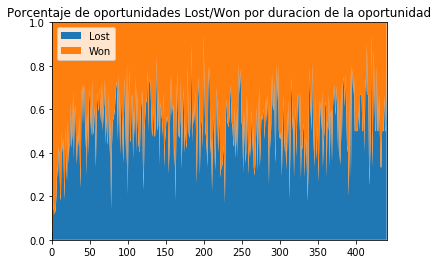

In [12]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"],  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Porcentaje de oportunidades Lost/Won por duracion de la oportunidad')
plt.show()

### Porcentaje de Lost VS Won por intervalos de 10 dias

In [13]:
df_cant_oportunidades_por_cant_dias["periodo"] = (((df_cant_oportunidades_por_cant_dias["duracion_oportunidad_en_dias"] // 10) + 1) * 10)
#df_cant_oportunidades_por_cant_dias.head(30)
df_won_vs_lost_cada_10_dias = df_cant_oportunidades_por_cant_dias.groupby(["periodo", "Stage"]).agg({'cantidad_oportunidades': 'sum'}).unstack()
df_won_vs_lost_cada_10_dias

cantidad_oportunidades           
Stage              Closed Lost Closed Won
periodo                                  
10                       114.0      941.0
20                       103.0      179.0
30                       130.0      156.0
40                       115.0      129.0
50                       112.0       89.0
...                        ...        ...
1210                       1.0        NaN
1220                       1.0        NaN
1230                       2.0        NaN
1500                       1.0        NaN
1780                       1.0        NaN

[104 rows x 2 columns]

In [14]:
df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.fillna(0)
#df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.dropna()

In [15]:
df_won_vs_lost_cada_10_dias_perc = df_won_vs_lost_cada_10_dias.divide(df_won_vs_lost_cada_10_dias.sum(axis=1), axis=0)
df_won_vs_lost_cada_10_dias_perc.columns = ["Lost","Won"]
df_won_vs_lost_cada_10_dias_perc

,Lost,Won
periodo,,
10,0.108057,0.891943
20,0.365248,0.634752
30,0.454545,0.545455
40,0.471311,0.528689
50,0.557214,0.442786
...,...,...
1210,1.000000,0.000000
1220,1.000000,0.000000
1230,1.000000,0.000000


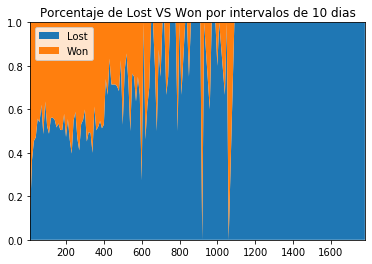

In [16]:
#rows = len(df_won_vs_lost_cada_10_dias_perc.index + 1)
#range(0,rows)
plt.stackplot(df_won_vs_lost_cada_10_dias_perc.index,  df_won_vs_lost_cada_10_dias_perc["Lost"],  df_won_vs_lost_cada_10_dias_perc["Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Porcentaje de Lost VS Won por intervalos de 10 dias')
plt.show()

### Cantidad de productos vendidos (Closed Won) segun la fuente de la creacion de la oportunidad

In [17]:
df_close_won = df.loc[(df['Stage'] == 'Closed Won') & (df['Source '] != 'None')]
df_close_won_x_source = df_close_won.groupby(["Source "]).agg({"Stage":'count'}).reset_index()
df_close_won_x_source.columns = ["Source", "Ventas"]
df_close_won_x_source = df_close_won_x_source.nlargest(10,"Ventas")
df_close_won_x_source

,Source,Ventas
8,Source_7,1393
2,Source_11,916
9,Source_9,839
3,Source_13,587
5,Source_3,210
0,Source_1,48
1,Source_10,36
4,Source_2,30
6,Source_4,19
7,Source_6,5


Text(0, 0.5, 'Ventas')

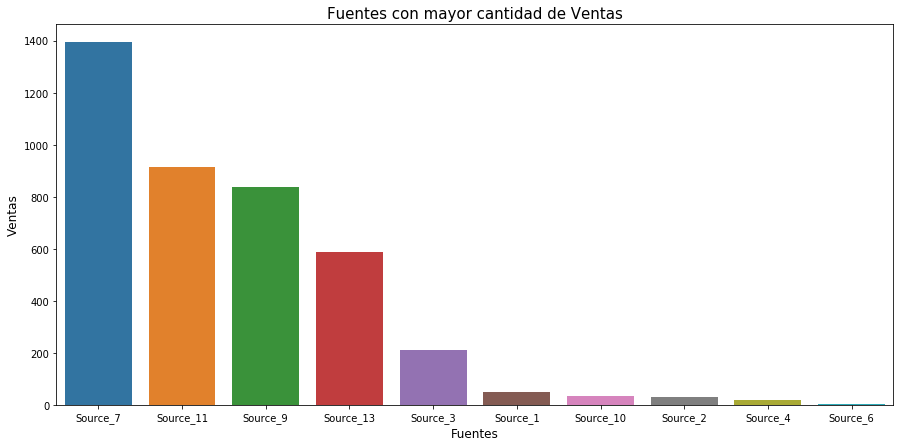

In [18]:
fig, ax = plt.subplots(figsize = (15, 7))
g = sns.barplot(x=df_close_won_x_source['Source'], y=df_close_won_x_source['Ventas'], orient='v',ax = ax,)
g.set_title("Fuentes con mayor cantidad de Ventas", fontsize=15)
g.set_xlabel("Fuentes", fontsize=12)
g.set_ylabel("Ventas", fontsize=12)

### Cantidad de ventas (Closed Won) x trimestre por cada region

In [19]:
df_x_region_x_trim = df[df['Stage'] == 'Closed Won'].groupby(["Region","Delivery_Quarter"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_trim.columns = ["Region", "Trimestre", "Ventas"]
df_x_region_x_trim

,Region,Trimestre,Ventas
0,APAC,Q1,401
1,APAC,Q2,462
2,APAC,Q3,500
3,APAC,Q4,533
4,Americas,Q1,358
5,Americas,Q2,458
6,Americas,Q3,432
7,Americas,Q4,545
8,EMEA,Q1,603
9,EMEA,Q2,716


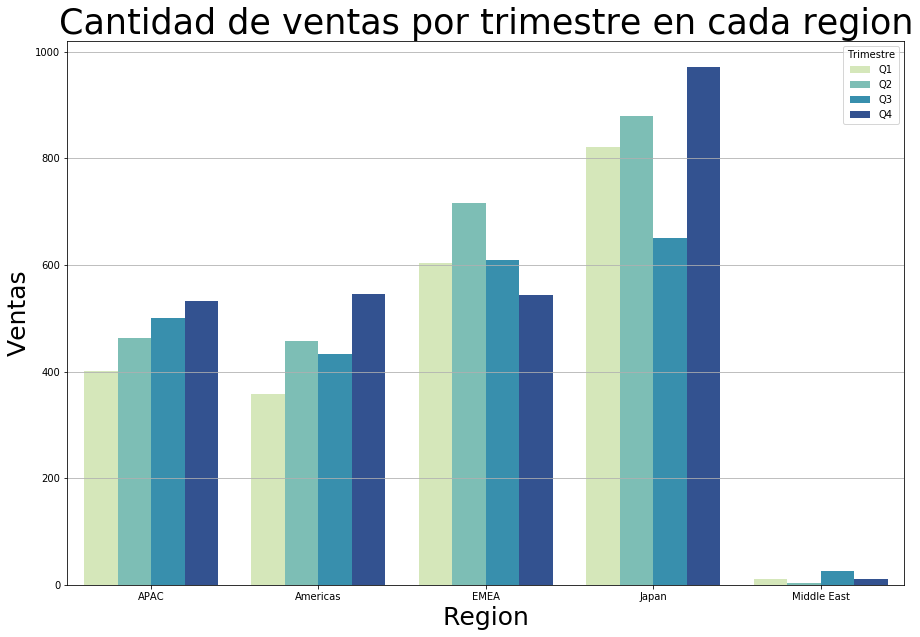

In [20]:
fig,ax=plt.subplots(figsize=(15,10))

plt.grid(True)
g = sns.barplot(ax=ax,data=df_x_region_x_trim,x='Region',y='Ventas',palette='YlGnBu',alpha=1,hue='Trimestre')
g.set_title('Cantidad de ventas por trimestre en cada region',size=35)
g.set_xlabel('Region',size=25)
g.set_ylabel('Ventas',size=25)
g.legend(title='Trimestre')

### Relacion Won/Lost con y sin permiso de precio, por cada region

In [21]:
df_x_region_x_permiso_price = df[((df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")) & (df["Pricing, Delivery_Terms_Quote_Appr"] == 1)].groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved", "Stage", "Opportunity_ID"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_permiso_price = df_x_region_x_permiso_price.groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved", "Stage"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_permiso_price["Total"] = df_x_region_x_permiso_price.groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved"]).transform('sum')["ID"]
df_x_region_x_permiso_price["Porcentaje"] = df_x_region_x_permiso_price["ID"] / df_x_region_x_permiso_price["Total"]
df_x_region_x_permiso_price.head(10)

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Stage,ID,Total,Porcentaje
0,APAC,1,0,Closed Lost,305,423,0.72104
1,APAC,1,0,Closed Won,118,423,0.27896
2,APAC,1,1,Closed Lost,362,976,0.370902
3,APAC,1,1,Closed Won,614,976,0.629098
4,Americas,1,0,Closed Lost,448,619,0.723748
5,Americas,1,0,Closed Won,171,619,0.276252
6,Americas,1,1,Closed Lost,649,1133,0.572816
7,Americas,1,1,Closed Won,484,1133,0.427184
8,EMEA,1,0,Closed Lost,365,577,0.632582
9,EMEA,1,0,Closed Won,212,577,0.367418


In [22]:
df_closed_won_sin_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Won") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_lost_sin_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Lost") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_won_con_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Won") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 1) \
                                ,"Porcentaje"]
df_closed_lost_con_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Lost") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 1) \
                                ,"Porcentaje"]

NameError: name 'bars1' is not defined

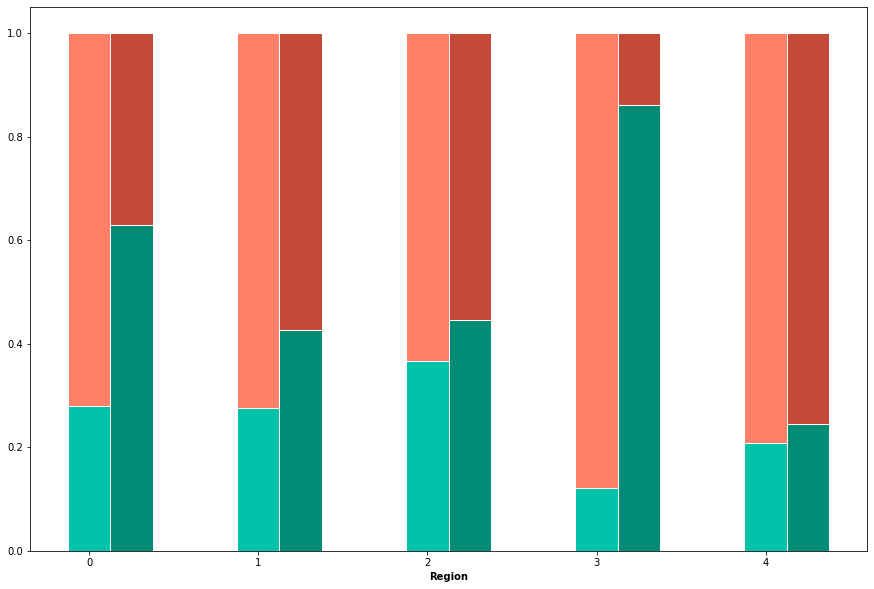

In [23]:
# Seteos grales del grafico
fig,ax=plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# Seteo de lista de datos
barsWonSinPermiso = df_closed_won_sin_permiso
barsWonConPermiso = df_closed_won_con_permiso
barsLostSinPermiso = df_closed_lost_sin_permiso
barsLostConPermiso = df_closed_lost_con_permiso
 
# Seteo posiciones de barras
r1 = np.arange(len(barsWonSinPermiso))
r2 = [x + barWidth for x in r1]
 
# Genero Grafico
plt.bar(r1, barsWonSinPermiso, color='#00C2A8', width=barWidth, edgecolor='white', label='Ganadas Sin Permiso')
plt.bar(r1, barsLostSinPermiso, bottom=barsWonSinPermiso, color='#FF8066', width=barWidth, edgecolor='white', label='Perdidas Sin Permiso')
plt.bar(r2, barsWonConPermiso, color='#008B74', width=barWidth, edgecolor='white', label='Ganadas Con Permiso')
plt.bar(r2, barsLostConPermiso, bottom=barsWonConPermiso, color='#C34A36', width=barWidth, edgecolor='white', label='Perdidas Con Permiso')
 
# Seteo descripcion de ejes
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_x_region_x_permiso_price["Region"].unique())
plt.ylabel('Proporcion', fontweight='bold')
 
# Muestro grafico
plt.title('Relacion Won/Lost con y sin permiso de precio, por cada region',size=35)
plt.legend()
plt.show()

### Relacion Won/Lost con y sin codigo burocratico conseguido, por cada region

In [ ]:
df_x_region_x_codigo_buroc = df[((df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")) & (df["Bureaucratic_Code_0_Approval"] == 1)].groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved", "Stage", "Opportunity_ID"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_codigo_buroc = df_x_region_x_codigo_buroc.groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved", "Stage"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_codigo_buroc["Total"] = df_x_region_x_codigo_buroc.groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved"]).transform('sum')["ID"]
df_x_region_x_codigo_buroc["Porcentaje"] = df_x_region_x_codigo_buroc["ID"] / df_x_region_x_codigo_buroc["Total"]
df_x_region_x_codigo_buroc.head(10)

In [ ]:
df_closed_won_sin_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Won") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_lost_sin_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Lost") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_won_con_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Won") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 1) \
                                ,"Porcentaje"]
df_closed_lost_con_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Lost") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 1) \
                                ,"Porcentaje"]

In [ ]:
# Seteos grales del grafico
fig,ax=plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# Seteo de lista de datos
barsWonSinCodigo_buroc = df_closed_won_sin_codigo_buroc
barsWonConCodigo_buroc = df_closed_won_con_codigo_buroc
barsLostSinCodigo_buroc = df_closed_lost_sin_codigo_buroc
barsLostConCodigo_buroc = df_closed_lost_con_codigo_buroc
 
# Seteo posiciones de barras
r1 = np.arange(len(barsWonSinCodigo_buroc))
r2 = [x + barWidth for x in r1]
 
# Genero Grafico
plt.bar(r1, barsWonSinCodigo_buroc, color='#00C2A8', width=barWidth, edgecolor='white', label='Ganadas Sin Codigo Burocratico')
plt.bar(r1, barsLostSinCodigo_buroc, bottom=barsWonSinCodigo_buroc, color='#FF8066', width=barWidth, edgecolor='white', label='Perdidas Sin Codigo Burocratico')
plt.bar(r2, barsWonConCodigo_buroc, color='#008B74', width=barWidth, edgecolor='white', label='Ganadas Con Codigo Burocratico')
plt.bar(r2, barsLostConCodigo_buroc, bottom=barsWonConCodigo_buroc, color='#C34A36', width=barWidth, edgecolor='white', label='Perdidas Con Codigo Burocratico')
 
# Seteo descripcion de ejes
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_x_region_x_codigo_buroc["Region"].unique())
plt.ylabel('Proporcion', fontweight='bold')
 
# Muestro grafico
plt.title('Relacion Won/Lost con y sin codigo burocratico conseguido, por region',size=35)
plt.legend()
plt.show()

In [ ]:
### Top 10 de tipos de oportunidad con mayor cantidad de ventas

In [ ]:
df_won_x_op_type = df[df["Stage"] == "Closed Won"][["Opportunity_Type","Opportunity_ID"]].groupby(["Opportunity_Type", "Opportunity_ID"]).agg({"Opportunity_ID": 'count'})
df_won_x_op_type = df_won_x_op_type.rename(columns={"Opportunity_ID": "Opportunity_count"}).reset_index()
df_won_x_op_type = df_won_x_op_type.groupby(["Opportunity_Type"]).agg({"Opportunity_ID": 'count'}).reset_index()
df_won_x_op_type.columns = ["Opportunity_Type", "Ventas"]
df_won_x_op_type = df_won_x_op_type.nlargest(10,"Ventas")
df_won_x_op_type

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
g = sns.barplot(x=df_won_x_op_type['Ventas'], y=df_won_x_op_type['Opportunity_Type'], orient='h',ax = ax,)
g.set_title("Top 10 de tipos de oportunidad con mayor cantidad de ventas", fontsize=15)
g.set_xlabel("Ventas", fontsize=12)
g.set_ylabel("Tipo de Oportunidad", fontsize=12)

In [ ]:
df[df["Opportunity_Type"] == "Opportunity_Type_0"][["Opportunity_Type","Stage","Opportunity_ID"]]

In [ ]:
df[["Source ","Region","ID"]].groupby(["Source ", "Region"]).agg({"ID":'count'}).unstack()

In [ ]:
# Create a dataset (fake)
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
 
# Default heatmap: just a visualization of this square matrix
p1 = sns.heatmap(df)


In [ ]:
df

In [ ]:
df["Stage","Opportunity_Type","Opportunity_ID"].value_counts()
df[["Source ","Region","ID"]].groupby(["Source ", "Region"]).agg({"ID":'count'}).unstack()


In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df_bla = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
# number of variable
categories=list(df_bla)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(2,2,row+1, polar=True, )
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Ind1
values=df_bla.loc[row].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
ax.fill(angles, values, color=color, alpha=0.4)
 
# Add a title
plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_bla.index))
 
# Loop to plot
for row in range(0, len(df_bla.index)):
make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

In [ ]:

 
#df.iloc[:,1]
categories

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 15, 30, 6],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.iloc[:,1].values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)



In [ ]:
categories

In [ ]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()



In [ ]:
df_x_region_x_brand = df[df['Stage'] == 'Closed Won'].groupby(["Region","Brand"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_brand.columns = ["Region", "Marca", "Ventas"]
df_x_region_x_brand

In [ ]:
#df_x_region_x_trim.reset_index(level='Delivery_Quarter').index.group()

In [ ]:
#df_x_region_x_trim.columns = ["Q1", "Q2", "Q3", "Q4"]
#df_x_region_x_trim["Total_Ventas"] = df_x_region_x_trim.Q1 + df_x_region_x_trim.Q2 + df_x_region_x_trim.Q3 + df_x_region_x_trim.Q4
#df_x_region_x_trim

In [ ]:
#df_x_region_x_trim.Total_Ventas
df_x_region_x_trim.Region.unique()

In [ ]:
# Make data: I have 3 groups and 7 subgroups
nombres_grupos=regiones#['groupA', 'groupB', 'groupC']
tamanio_grupos=total_x_region  #[12,11,30]
subgroup_names=["Q1", "Q2", "Q1", "Q2", "Q1", "Q2", "Q1", "Q2", "Q1", "Q2"]#, "Q3", "Q4", "Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4"]
subgroup_size=[1800,96,1700,93,2400,71,3300,23,25,25]
 
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(tamanio_grupos, radius=1.3, labels=nombres_grupos, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [ ]:
#df["Actual_Delivery_Date"].tail(20)
#df["Opportunity_Created_Date"].head(20)
#df[df["ID"] == 12703][["ID","Planned_Delivery_Start_Date"]].tail(20)
#df[df["Actual_Delivery_Date"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)
df["Fecha"] = df["Actual_Delivery_Date"].isnull()
df["Last_Modified_Date"].value_counts()

In [ ]:
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')
df["Last_Modified_Date"].head(10)
#df[df["Fecha"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)

In [ ]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')
df["Opportunity_Created_Date"].head(12)

In [ ]:
#df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days
df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                    [('diferencia_en_dias','count')]) #, 'Stage': (lambda x: np.count // 10)})

df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'diferencia_en_dias':'count'})

#.agg(    [('one',  np.mean),     ('two', lambda value: 100* ((value>32).sum() / reading.mean())),     ('test2', lambda value: 100* ((value > 45).sum() / value.mean()))])

In [ ]:
df_cant_oportunidades_por_cant_dias = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
df_cant_oportunidades_por_cant_dias

In [ ]:
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
df_cant_oportunidades_por_cant_dias_Won.head(10)

In [ ]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

In [ ]:
df_cant_oportunidades_por_cant_dias["periodo"] = (((df_cant_oportunidades_por_cant_dias["duracion_oportunidad_en_dias"] // 10) + 1) * 10)
#df_cant_oportunidades_por_cant_dias.head(30)
df_won_vs_lost_cada_10_dias = df_cant_oportunidades_por_cant_dias.groupby(["periodo", "Stage"]).agg({'cantidad_oportunidades': 'sum'}).unstack()
df_won_vs_lost_cada_10_dias

In [ ]:
df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.fillna(0)
#df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.dropna()

In [ ]:
df_won_vs_lost_cada_10_dias_perc = df_won_vs_lost_cada_10_dias.divide(df_won_vs_lost_cada_10_dias.sum(axis=1), axis=0)
df_won_vs_lost_cada_10_dias_perc.columns = ["Lost","Won"]
df_won_vs_lost_cada_10_dias_perc

In [ ]:
rows = len(df_won_vs_lost_cada_10_dias_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_won_vs_lost_cada_10_dias_perc["Lost"],  df_won_vs_lost_cada_10_dias_perc["Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Won VS Lost segun duracion de la oportunidad')
plt.show()

In [ ]:
df_cant_oportunidades_por_cant_dias


df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                                                    {'diferencia_en_dias':'count'
                                                     ,'Stage': lambda x: ((x.count() // 10) + 1)*10
                                                    })

In [ ]:
df.groupby(["Opportunity_ID"]).agg({"ID":'min', "Stage":'count'}).nlargest(10,"Stage")

In [ ]:
df[df["Opportunity_ID"] == 2008][["ID", "Opportunity_ID", "Opportunity_Created_Date", "Last_Modified_Date", "Stage"]]

In [ ]:
a = df[df["Last_Modified_Date"] == df["Opportunity_Created_Date"]][["ID", "Last_Modified_Date", "Opportunity_Created_Date","Stage"]]
a.groupby(["Stage"]).agg({"ID":"count"})

In [ ]:
df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df_fechas["diferencia"] = (df_fechas["Last_Modified_Date"] - df_fechas["Opportunity_Created_Date"]).dt.days
df_fechas["mod"] = df_fechas["diferencia"] // 10
df_fechas

In [ ]:
ax = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Won',color='Green', \
                               label='Closed Won')

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

In [ ]:
ax = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

In [ ]:
df['Account_Owner'].value_counts()

In [ ]:
df['Brand'].value_counts()

In [ ]:
df['Product_Type'].value_counts()

In [ ]:

# Make data
data = pd.DataFrame({  'group_A':[1,3,6,8,9], 'group_B':[1,3,7,10,30], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],   labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


PRUEBAS

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(20)
y = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])
ax = sns.distplot(y)
plt.show()